In [1]:
# Libraries
## Mathematics
import numpy as np
from scipy.stats import rv_discrete, rv_continuous, norm
from scipy.integrate import quad
from scipy.interpolate import interp1d

## Visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [2]:
# Load functions .py files
from Theoretical_boundaries_visualization_functions import optimal_stopping_Brownian_bridge, optimal_stopping_Normal
from Checking_simulated_boundary_functions_2 import simulate_brownian_bridge_2, mu_ty_simulator_2, compute_v_expec_2, parallel_loop_2, v_expectance_2, optimal_stopping_montecarlo_2

# Exact optimal stopping boundary for a Dirac Delta distribution

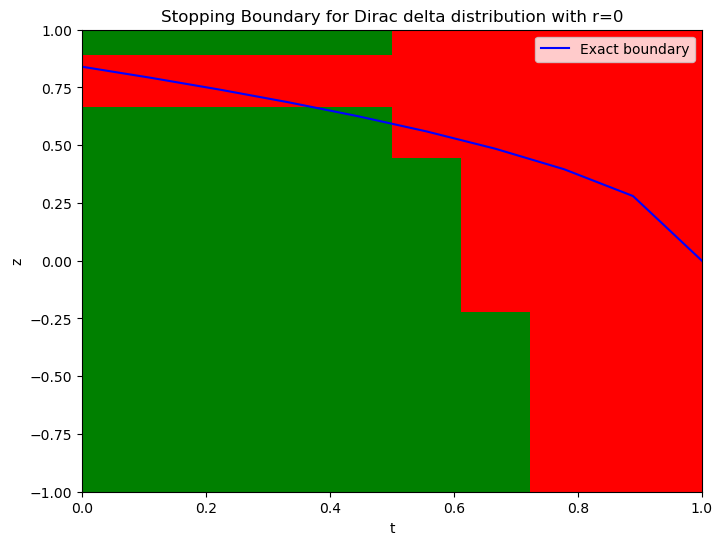

In [5]:
# Pinning point
r = 0

# t mesh
mesh = 10
t_mesh = np.linspace(0, 1, mesh)

# Boundary
exact_boundary = optimal_stopping_Brownian_bridge(t_mesh, r)
L = 10
np.random.seed(123)
value_function, X_vals = optimal_stopping_montecarlo_2(mu = "discrete", weights = np.array([1]), parameters = np.array([[r],[1]]), N = mesh, a = -1, b = 1, L = L, M = 2000)
value_function_BB = value_function.copy()
# Plotting
if mesh != L:
    # Adjust meshgrid for different dimensions
    T, X = np.meshgrid(t_mesh, np.linspace(np.min(X_vals), np.max(X_vals), L))
    
    # Interpole value_function to adjust `t_mesh`
    interp_func = interp1d(np.linspace(0, 1, mesh), value_function, axis=0, kind='linear', fill_value="extrapolate")
    value_function_interp = interp_func(t_mesh)
    
    # Adjust X_vals to match value_function_interp
    X_grid = np.linspace(np.min(X_vals), np.max(X_vals), L)
    comparison = value_function_interp <= np.tile(X_grid, (mesh, 1))
    
    # Define colors
    cmap = mcolors.ListedColormap(['green', 'red'])
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.plot(t_mesh, exact_boundary, 'b-', label="Exact boundary")
    plt.pcolormesh(T, X, comparison.T, cmap=cmap, shading='auto')
    plt.xlabel("t")
    plt.ylabel("z")
    plt.title(f"Stopping Boundary for Dirac delta distribution with r={r}")
    plt.legend()
    plt.xlim(0, 1)
    plt.ylim(np.min(X_vals), np.max(X_vals))
    plt.show()

else:
    # Adjust meshgrid
    T, X = np.meshgrid(t_mesh, X_vals)
    
    # Define colors and mapping
    comparison = value_function <= np.tile(X_vals, (len(t_mesh), 1)) # Boolean matrix
    colors = np.where(comparison, 1, 0)  # 1 for True (red), 0 for False (green))
    cmap = plt.cm.colors.ListedColormap(['green', 'red'])
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.plot(t_mesh, exact_boundary, 'b-', label="Exact boundary")
    plt.pcolormesh(T, X, comparison, cmap=cmap, shading='auto')
    plt.xlabel("t")
    plt.ylabel("z")
    plt.title(f"Stopping Boundary for Dirac delta distribution with r={r}")
    plt.legend()
    plt.xlim(0, 1)
    plt.ylim(np.min(X_vals), np.max(X_vals))
    plt.show()

# Theoretical optimal stopping boundary for a Normal distribution with standard deviation lower than 1

## Standard deviation of 1/2

0 1.0


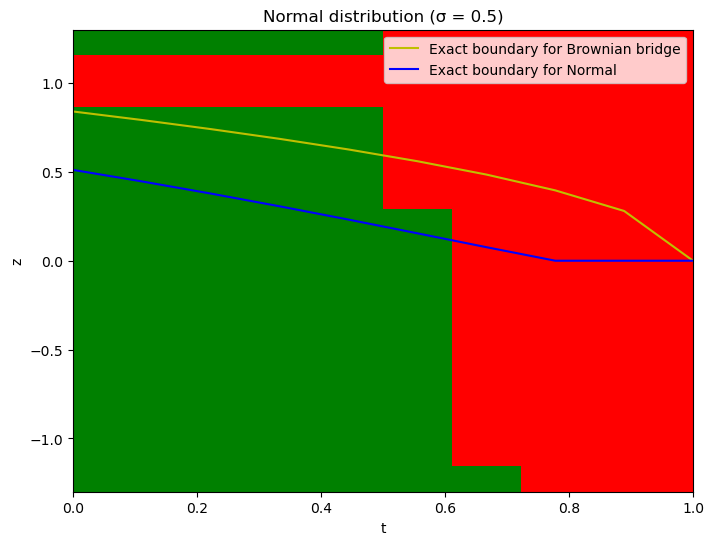

In [6]:
# Temporal mesh
mesh = 10
t_mesh = np.linspace(0, 1, mesh)

# Exact Brownian bridge boundary
r = 0
exact_boundary_BB = optimal_stopping_Brownian_bridge(t_mesh, r)

# Normal distribution setup
mean = r
sigma = 1/2
L = 10

np.random.seed(123)
value_function, X_vals = optimal_stopping_montecarlo_2(mu="continuous", weights=np.array([1]), parameters=np.array([[mean], [sigma]]), N=mesh, a=-1.3, b=1.3, L=L, M=3000, alpha = 1.25)

exact_boundary_Normal = optimal_stopping_Normal(mesh=t_mesh, m=mean, gamma=sigma, tol=1e-6)
if mesh != L:
    # Adjust meshgrid for different dimensions
    T, X = np.meshgrid(t_mesh, np.linspace(np.min(X_vals), np.max(X_vals), L))
    
    # Interpole value_function to adjust `t_mesh`
    interp_func = interp1d(np.linspace(0, 1, mesh), value_function, axis=0, kind='linear', fill_value="extrapolate")
    value_function_interp = interp_func(t_mesh)
    
    # Adjust X_vals to match value_function_interp
    X_grid = np.linspace(np.min(X_vals), np.max(X_vals), L)
    comparison = value_function_interp <= np.tile(X_grid, (mesh, 1))
    
    # Define colors
    cmap = mcolors.ListedColormap(['green', 'red'])
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.plot(t_mesh, exact_boundary_BB, 'y-', label="Exact boundary for Brownian bridge")
    plt.plot(t_mesh, exact_boundary_Normal, 'b-', label="Exact boundary for Normal")
    plt.pcolormesh(T, X, comparison.T, cmap=cmap, shading='auto')
    plt.xlabel("t")
    plt.ylabel("z")
    plt.title(f"Normal distribution (σ^2 = {sigma2})")
    plt.legend()
    plt.xlim(0, 1)
    plt.ylim(np.min(X_vals), np.max(X_vals))
    plt.show()

else:
    # Adjust meshgrid
    T, X = np.meshgrid(t_mesh, X_vals)
    
    # Define colors and mapping
    comparison = value_function <= np.tile(X_vals, (len(t_mesh), 1)) # Boolean matrix
    colors = np.where(comparison, 1, 0)  # 1 for True (red), 0 for False (green))
    cmap = plt.cm.colors.ListedColormap(['green', 'red'])
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.plot(t_mesh, exact_boundary_BB, 'y-', label="Exact boundary for Brownian bridge")
    plt.plot(t_mesh, exact_boundary_Normal, 'b-', label="Exact boundary for Normal")
    plt.pcolormesh(T, X, comparison, cmap=cmap, shading='auto')
    plt.xlabel("t")
    plt.ylabel("z")
    plt.title(f"Normal distribution (σ = {sigma})")
    plt.legend()
    plt.xlim(0, 1)
    plt.ylim(np.min(X_vals), np.max(X_vals))
    plt.show()

# Mixture

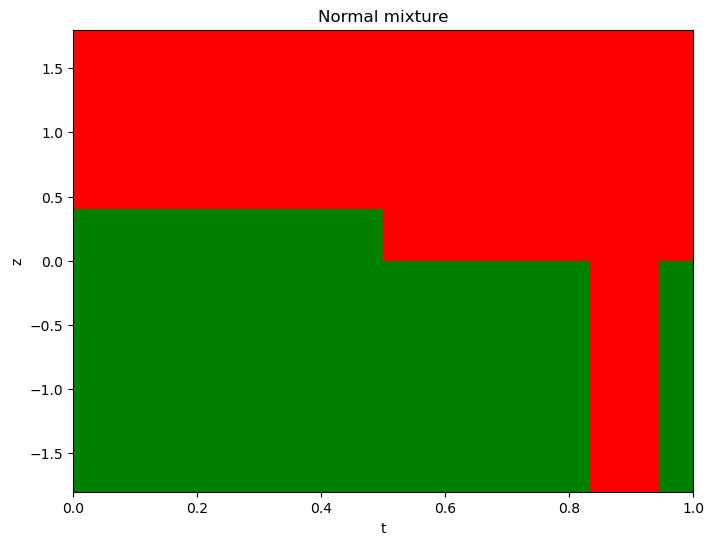

In [7]:
# t mesh
mesh = 10
t_mesh = np.linspace(0, 1, mesh) # Temporal grid

# Spatial grid
L = 10

np.random.seed(123)
value_function, X_vals = optimal_stopping_montecarlo_2(mu = "continuous", weights = np.array([1/2, 1/2]), parameters = np.array([[-1/2, 1/2],[1/2, 1/2]]), N = mesh, a = -1.8, b = 1.8, L = L, M = 3000)

value_function_Mixture = value_function.copy()

if mesh != L:
    # Adjust meshgrid for different dimensions
    T, X = np.meshgrid(t_mesh, np.linspace(np.min(X_vals), np.max(X_vals), L))
    
    # Interpole value_function to adjust `t_mesh`
    interp_func = interp1d(np.linspace(0, 1, mesh), value_function, axis=0, kind='linear', fill_value="extrapolate")
    value_function_interp = interp_func(t_mesh)
    
    # Adjust X_vals to match value_function_interp
    X_grid = np.linspace(np.min(X_vals), np.max(X_vals), L)
    comparison = value_function_interp <= np.tile(X_grid, (mesh, 1))
    
    # Define colors
    cmap = mcolors.ListedColormap(['green', 'red'])
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(T, X, comparison.T, cmap=cmap, shading='auto')
    plt.xlabel("t")
    plt.ylabel("z")
    plt.title(f"Normal mixture")
    plt.xlim(0, 1)
    plt.ylim(np.min(X_vals), np.max(X_vals))
    plt.show()

else:
    # Adjust meshgrid
    T, X = np.meshgrid(t_mesh, X_vals)
    
    # Define colors and mapping
    comparison = value_function <= np.tile(X_vals, (len(t_mesh), 1)) # Boolean matrix
    colors = np.where(comparison, 1, 0)  # 1 for True (red), 0 for False (green))
    cmap = plt.cm.colors.ListedColormap(['green', 'red'])
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(T, X, comparison.T, cmap=cmap, shading='auto')
    plt.xlabel("t")
    plt.ylabel("z")
    plt.title(f"Normal mixture")
    plt.xlim(0, 1)
    plt.ylim(np.min(X_vals), np.max(X_vals))
    plt.show()

# Version timing

In [8]:
# Libraries
## Mathematics
import numpy as np
import pandas as pd
from scipy.stats import rv_discrete, rv_continuous, norm
from scipy.integrate import quad
from scipy.interpolate import interp1d
from time import time

In [9]:
# Load functions .py files
from Checking_simulated_boundary_functions_1 import simulate_brownian_bridge_1, mu_ty_simulator_1, compute_v_expec_1, v_expectance_1, optimal_stopping_montecarlo_1
from Checking_simulated_boundary_functions_2 import simulate_brownian_bridge_2, mu_ty_simulator_2, compute_v_expec_2, parallel_loop_2, v_expectance_2, optimal_stopping_montecarlo_2
from Checking_simulated_boundary_functions_3 import simulate_brownian_bridge_3, mu_ty_simulator_3, compute_v_expec_3, parallel_loop_3, v_expectance_3, optimal_stopping_montecarlo_3
from Checking_simulated_boundary_functions_4 import simulate_brownian_bridge_4, mu_ty_simulator_4, compute_v_expec_4, parallel_loop_4, v_expectance_4, optimal_stopping_montecarlo_4

## Brownian Bridge

In [ ]:
# Initialize variables
r = 0 #Pinning point
mesh = 10 # Points in temporal grid
N = mesh
L = 10 # Points in the spatial grid
M = 10 # Monte Carlo iterations
mu = "discrete" # Type of mixture
weights = np.array([1]) # Weights in the mixture
parameters = np.array([[r],[1]]) # Parameters of each distribution in the mixture
a = -1 # Lower bound of the spatial grid
b = 1 # Upper bound of the spatial grid

timing_results = {} # Timing dictionary


# Version 1
start1 = time()
np.random.seed(123)
value_function, X_vals = optimal_stopping_montecarlo_1(mu = mu, 
                                                     weights = weights, 
                                                     parameters = parameters, 
                                                     N = mesh, 
                                                     a = a, 
                                                     b = b, 
                                                     L = L, 
                                                     M = M)
end1 = time()

timing_results["Version 1"] = {"Total Time (minutes)": (end1 - start1)/60}

# Version 2
start2 = time()
np.random.seed(123)
value_function, X_vals = optimal_stopping_montecarlo_2(mu = mu, 
                                                     weights = weights, 
                                                     parameters = parameters, 
                                                     N = mesh, 
                                                     a = a, 
                                                     b = b, 
                                                     L = L, 
                                                     M = M)
end2 = time()

timing_results["Version 2"] = {"Total Time (minutes)": (end2 - start2)/60}

# Version 3
start3 = time()
np.random.seed(123)
value_function, X_vals = optimal_stopping_montecarlo_3(mu = mu, 
                                                     weights = weights, 
                                                     parameters = parameters, 
                                                     N = mesh, 
                                                     a = a, 
                                                     b = b, 
                                                     L = L, 
                                                     M = M)
end3 = time()

timing_results["Version 3"] = {"Total Time (minutes)": (end3 - start3)/60}

# Version 4
start4 = time()
np.random.seed(123)
value_function, X_vals = optimal_stopping_montecarlo_4(mu = mu, 
                                                     weights = weights, 
                                                     parameters = parameters, 
                                                     N = mesh, 
                                                     a = a, 
                                                     b = b, 
                                                     L = L, 
                                                     M = M)
end4 = time()

timing_results["Version 4"] = {"Total Time (minutes)": (end4 - start4)/60}

# Convert dictionary to DataFrame
df_timings_BB = pd.DataFrame.from_dict(timing_results, orient='index')

print(df_timings_BB)

## Normal distribution with standar deviation lower than 1

In [ ]:
# Initialize variables
mean = 0 # Mean
sigma = 1/2 # Standard deviation
mesh = 10 # Points in temporal grid
N = mesh
L = 10 # Points in the spatial grid
M = 10 # Monte Carlo iterations
mu = "continuous" # Type of mixture
weights = np.array([1]) # Weights in the mixture
parameters = np.array([[mean], [sigma]]) # Parameters of each distribution in the mixture
a = -1.3 # Lower bound of the spatial grid
b = 1.3 # Upper bound of the spatial grid

timing_results = {} # Timing dictionary


# Version 1
start1 = time()
np.random.seed(123)
value_function, X_vals = optimal_stopping_montecarlo_1(mu = mu, 
                                                     weights = weights, 
                                                     parameters = parameters, 
                                                     N = mesh, 
                                                     a = a, 
                                                     b = b, 
                                                     L = L, 
                                                     M = M)
end1 = time()

timing_results["Version 1"] = {"Total Time (minutes)": (end1 - start1)/60}

# Version 2
start2 = time()
np.random.seed(123)
value_function, X_vals = optimal_stopping_montecarlo_2(mu = mu, 
                                                     weights = weights, 
                                                     parameters = parameters, 
                                                     N = mesh, 
                                                     a = a, 
                                                     b = b, 
                                                     L = L, 
                                                     M = M)
end2 = time()

timing_results["Version 2"] = {"Total Time (minutes)": (end2 - start2)/60}

# Version 3
start3 = time()
np.random.seed(123)
value_function, X_vals = optimal_stopping_montecarlo_3(mu = mu, 
                                                     weights = weights, 
                                                     parameters = parameters, 
                                                     N = mesh, 
                                                     a = a, 
                                                     b = b, 
                                                     L = L, 
                                                     M = M)
end3 = time()

timing_results["Version 3"] = {"Total Time (minutes)": (end3 - start3)/60}

# Version 4
start4 = time()
np.random.seed(123)
value_function, X_vals = optimal_stopping_montecarlo_4(mu = mu, 
                                                     weights = weights, 
                                                     parameters = parameters, 
                                                     N = mesh, 
                                                     a = a, 
                                                     b = b, 
                                                     L = L, 
                                                     M = M)
end4 = time()

timing_results["Version 4"] = {"Total Time (minutes)": (end4 - start4)/60}

# Convert dictionary to DataFrame
df_timings_Normal = pd.DataFrame.from_dict(timing_results, orient='index')

print(df_timings_Normal)